In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Get the current working directory
cwd = os.getcwd()

# Get the path to the project's root directory
root_path = os.path.abspath(os.path.join(cwd, os.pardir))

# Add the project's root directory to the Python module search path
sys.path.append(root_path)

In [2]:
from implementation.newton_raphson import newton_raphson


def objective_function(x):
    return np.sin(x) + np.sin(2 * x) + np.sin(3 * x)


def gradient_function(x):
    return np.array([np.cos(x) + 2 * np.cos(2 * x) + 3 * np.cos(3 * x)])


def hessian_function(x):
    return np.array([-np.sin(x) - 4 * np.sin(2 * x) - 9 * np.sin(3 * x)])


initial_point = np.array([1])  # Initial point for optimization

# Apply Newton-Raphson method
minimum_point, visited_points = newton_raphson(
    objective_function, gradient_function, hessian_function, initial_point
)

print("Minimum point:", minimum_point)
print("Visited Points:", visited_points)

Minimum point: [0.66729107]
Visited Points: [[1], [0.43257680410878574], [0.6810400081122407], [0.6672200001918197], [0.6672910698082496]]


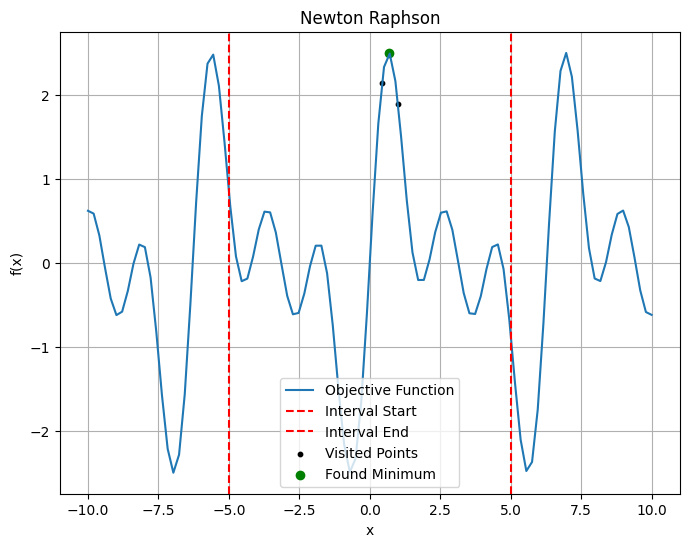

In [3]:
# Interval
a = -5
b = 5

# Generate points for the function plot
x_vals = np.linspace(a - 5, b + 5, 100)
y_vals = objective_function(x_vals)

# Plot the function and search intervals
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="Objective Function")
plt.axvline(a, color="red", linestyle="--", label="Interval Start")
plt.axvline(b, color="red", linestyle="--", label="Interval End")

# Extract the x and y values of the visited points
visited_x_vals = [point[0] for point in visited_points]
visited_y_vals = [objective_function(np.array([x])) for x in visited_x_vals]

# Add visited points to the plot
plt.scatter(visited_x_vals, visited_y_vals, color="black", s=10, label="Visited Points")

# Add found minimum to the plot
plt.scatter(
    minimum_point,
    objective_function(minimum_point),
    color="green",
    label="Found Minimum",
)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton Raphson")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from implementation.newton_raphson import newton_raphson


def f(x):
    return x[0] ** 2 + x[1] ** 2


def f_gradient(x):
    return np.array([2 * x[0], 2 * x[1]])


def f_hessian(x):
    return np.array([[2, 0], [0, 2]])  # The Hessian for your function


initial_point = np.array([1, 1])  # Initial point for optimization

# Apply gradient descent
minimum_point, visited_points = newton_raphson(f, f_gradient, f_hessian, initial_point)

print("Minimum point:", minimum_point)
print("Visited Points:", visited_points)

Minimum point: [0. 0.]
[[1, 1], [0.0, 0.0]]


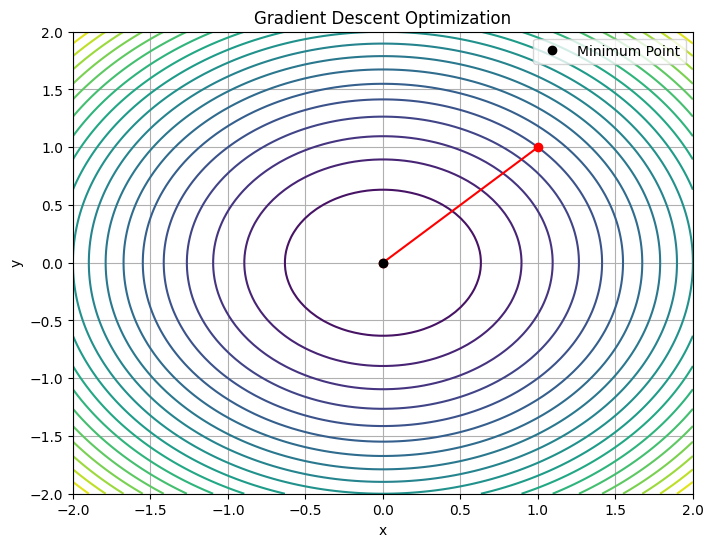

In [5]:
# Visualize the optimization process
visited_points = np.array(visited_points)

# Generate contour plot of the function
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis")

# Plot the visited points
plt.plot(visited_points[:, 0], visited_points[:, 1], "-o", color="red")

# Plot the minimum point
plt.plot(minimum_point[0], minimum_point[1], "ko", label="Minimum Point")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Optimization")
plt.legend()
plt.grid(True)
plt.show()